In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.1-cp36-none-any.whl size=5972 sha256=481ed1382d890b0b753dfe9d7c3a3588f272cfde783a368356ff8b4324f30d3c
  Stored in directory: /root/.cache/pip/wheels/7b/2a/35/c0c3749c1a36d4f454ea22d8396e1b854b86340d63cbbb7949
Successfully built apyori


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
from google.colab import files

In [ ]:
store_data=files.upload()

Saving TRAIN-ARULES (2).csv to TRAIN-ARULES (2).csv


In [ ]:
data = pd.read_csv('TRAIN-ARULES (2).csv')

data.dropna(how='any',axis=0) 
data.head()

,order_id,user_id,product_name
0,1483,90,Organic Pink Lemonade Bunny Fruit Snacks
1,1483,90,Dark Chocolate Minis
2,1483,90,"Sparkling Water, Natural Mango Essenced"
3,1483,90,Peach-Pear Sparkling Water
4,1483,90,Organic Heritage Flakes Cereal


In [ ]:
series = data.groupby(['order_id'])['product_name'].apply(list)
series.head()

order_id
1483     [Organic Pink Lemonade Bunny Fruit Snacks, Dar...
4595     [Creme De Menthe Thins, Milk Chocolate English...
7099     [Revive Zero Vitamin Water, VitaminWater Zero™...
8382     [Mountain Spring Water, Clementines, Bag, Pine...
14400    [Truffle, Sea Salt, Black Truffle, 1500 Pale Ale]
Name: product_name, dtype: object

In [ ]:
x=[]
for o in series:
    x.append(o)

In [ ]:
df=pd.DataFrame(x)
df.shape

(1418, 46)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,Organic Pink Lemonade Bunny Fruit Snacks,Dark Chocolate Minis,"Sparkling Water, Natural Mango Essenced",Peach-Pear Sparkling Water,Organic Heritage Flakes Cereal,Popped Salted Caramel Granola Bars,"Healthy Grains Granola Bar, Vanilla Blueberry",Flax Plus Organic Pumpkin Flax Granola,Sweet & Salty Nut Almond Granola Bars,Cool Mint Chocolate Energy Bar,Chocolate Chip Energy Bars,Trail Mix Fruit & Nut Chewy Granola Bars,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Creme De Menthe Thins,Milk Chocolate English Toffee Miniatures Candy...,Baker's Pure Cane Ultrafine Sugar,Plain Bagels,Cinnamon Bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Revive Zero Vitamin Water,VitaminWater Zero™ XXX Acai Blueberry Pomegranate,Vitamin Water Zero Rise Orange,Energy Tropical Citrus Vitamin Water Drink,Zero Vitamin Water,Vitamin Water Zero Squeezed Lemonade,Total 2% Lowfat Greek Strained Yogurt with Peach,Total 2% with Strawberry Lowfat Greek Strained...,Total 0% Nonfat Greek Yogurt,Total 0% Raspberry Yogurt,Natural Artesian Water,Original Turkey Jerky,Teriyaki Turkey Jerky,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Mountain Spring Water,"Clementines, Bag",Pineapple on the Bottom Greek Yogurt,Pomegranate on the Bottom Non-Fat Greek Yogurt,Original French Vanilla Yogurt,Original Lowfat Lemon Burst Yogurt,Jet-Dry Original Rinse Aid,Jumbo Cotton Balls,Hearty Grains 100% Whole Wheat English Muffins,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"Truffle, Sea Salt",Black Truffle,1500 Pale Ale,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
records = []
for i in range(0, 1418):    
    records.append([str(df.values[i,j]) for j in range(0, 20)])

Can we used in future:
for i,j in enumerate(records):
    while 'nan' in records[i]: records[i].remove('nan')

In [ ]:
association_rules = apriori(records, min_support=0.0045, min_length=2)
association_results = list(association_rules)

In [ ]:
print(len(association_results))

2359


In [ ]:
print(association_results[0])

RelationRecord(items=frozenset({'0% Greek Strained Yogurt'}), support=0.009873060648801129, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0% Greek Strained Yogurt'}), confidence=0.009873060648801129, lift=1.0)])


In [ ]:
for item in association_results:    
    # first index of the inner list    # Contains base item and add item  
    print(item[0])
    pair = item[0]     
    print(pair)    
    items = [x for x in pair]    
    print("Rule: ", items[0]," -> ",item[1])    
    #second index of the inner list    
    print("Support: " + str(item[1]))    
    #third index of the list located at 0th    #of the third index of the inner list    
    print("Confidence: " + str(item[2][0][2]))    
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

frozenset({'0% Greek Strained Yogurt'})
frozenset({'0% Greek Strained Yogurt'})
Rule:  0% Greek Strained Yogurt  ->  0.009873060648801129
Support: 0.009873060648801129
Confidence: 0.009873060648801129
Lift: 1.0
frozenset({'100% Juice, Variety Pack'})
frozenset({'100% Juice, Variety Pack'})
Rule:  100% Juice, Variety Pack  ->  0.004936530324400564
Support: 0.004936530324400564
Confidence: 0.004936530324400564
Lift: 1.0
frozenset({'100% Premium Select Not From Concentrate Pure Prune Juice'})
frozenset({'100% Premium Select Not From Concentrate Pure Prune Juice'})
Rule:  100% Premium Select Not From Concentrate Pure Prune Juice  ->  0.009167842031029619
Support: 0.009167842031029619
Confidence: 0.009167842031029619
Lift: 1.0
frozenset({'100% Recycled Paper Towels'})
frozenset({'100% Recycled Paper Towels'})
Rule:  100% Recycled Paper Towels  ->  0.005641748942172073
Support: 0.005641748942172073
Confidence: 0.005641748942172073
Lift: 1.0
frozenset({'1500 Pale Ale'})
frozenset({'1500 Pale 

Data from the test set is as follows. We will frequent sets that satisfy this association rule from training set and maintains a min. support of 0.0045.

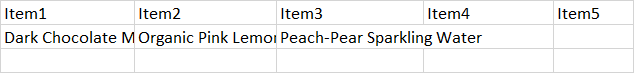

In [ ]:
freq_itemsets=[]
for item in association_results:   
    if (len(item[0])==5) & ('Dark Chocolate Minis' in item[0]) &  ('Organic Pink Lemonade Bunny Fruit Snacks' in item[0]) &  ('Peach-Pear Sparkling Water' in item[0]) & ('None' not in item[0]):
        print(item[0])
        freq_itemsets.append(item[0])
print ("No. of frequent datasets with min.support 0.0045 in the test set:",len(freq_itemsets))

frozenset({'Dark Chocolate Minis', 'Organic Heritage Flakes Cereal', 'Maple Pumpkin Seeds with Sea Salt Chewy with a Crunch Granola Bars', 'Peach-Pear Sparkling Water', 'Organic Pink Lemonade Bunny Fruit Snacks'})
frozenset({'Dark Chocolate Minis', 'Organic Heritage Flakes Cereal', 'Organic Graham Crunch Cereal', 'Peach-Pear Sparkling Water', 'Organic Pink Lemonade Bunny Fruit Snacks'})
frozenset({'Dark Chocolate Minis', 'Sparkling Water, Natural Mango Essenced', 'Organic Graham Crunch Cereal', 'Peach-Pear Sparkling Water', 'Organic Pink Lemonade Bunny Fruit Snacks'})
frozenset({'Dark Chocolate Minis', 'Organic Heritage Flakes Cereal', 'Sparkling Water, Natural Mango Essenced', 'Peach-Pear Sparkling Water', 'Organic Pink Lemonade Bunny Fruit Snacks'})
No. of frequent datasets with min.support 0.0045 in the test set: 4
